# **1. Setup**

# PARTE 1 - DESARROLLO

## Establecer Entorno de Trabajo

In [19]:
# Check python version
import sys
sys.version

'3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]'

In [20]:
!nvidia-smi

Sun Jun  9 21:41:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        Off | 00000000:01:00.0  On |                  N/A |
| 31%   38C    P5              38W / 170W |    966MiB / 12288MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Instalacion de paquetes necesarios

In [21]:
# Install pytorch for python 3.10 with CUDA 11.8 support
!pip3 install torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [22]:
!pip install Pillow==9.4.0
!pip show pillow #check pillow version

Name: Pillow
Version: 9.4.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: /home/merve/anaconda3/envs/pytorch_practice/lib/python3.10/site-packages
Requires: 
Required-by: matplotlib, torchvision


In [23]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [24]:
# !mkdir /content/gdrive/My\ Drive/P1aplicacionesIA

In [25]:
# !ls /content/gdrive/My\ Drive/P1aplicacionesIA

In [26]:
#move to a specific directory
# import os
# os.chdir('/content/gdrive/My Drive/P1aplicacionesIA/')
# !pwd

# **2. Carga de conjuntos de datos/imágenes (datasets)**

## Manejo de Datasets


### Datasets por defecto

#### Descarga CIFAR10

In [27]:
import subprocess
import os
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import time

In [28]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
download_dir = './data' #download directory
trainset = torchvision.datasets.CIFAR10(root=download_dir, train=True, download=True, transform=transform) #train set
testset = torchvision.datasets.CIFAR10(root=download_dir, train=False, download=True, transform=transform) #test set

print('Train dataset with ' + str(len(trainset)) + ' images')
print('Test dataset with ' + str(len(testset)) + ' images')

Files already downloaded and verified
Files already downloaded and verified
Train dataset with 50000 images
Test dataset with 10000 images


In [29]:
# number of samples/images per group
batch_size = 6

#load & convert images to tensors in Python
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True, num_workers=2)
trainloader_len = len(trainloader)

testloader = torch.utils.data.DataLoader(testset, batch_size, shuffle=False, num_workers=2)
testloader_len = len(testloader)

classes = ('plane', 'car', 'bird', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('Loaders done.')
print('Each batch with ' + str(batch_size) + ' samples/images')
print(f"Train dataset with {trainloader_len} batches")
print(f"Test dataset with {testloader_len} batches")
print('Available classes:')
print(classes)

Loaders done.
Each batch with 6 samples/images
Train dataset with 8334 batches
Test dataset with 1667 batches
Available classes:
('plane', 'car', 'bird', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


#### Visualización

In [30]:
# function to un-normalize and display an image
def imshow(img):
  img = img / 2 + 0.5 #desnormalizar
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

deer truck truck plane horse horse 

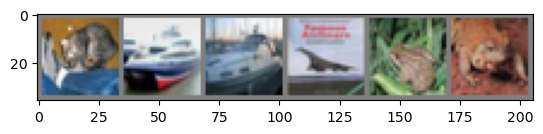

In [31]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Concatenate images
imgconcat = torchvision.utils.make_grid(images)

# Show image
imshow(imgconcat)

# Print labels
for i in range(batch_size):
  print(classes[labels[i]], end=' ')



### Bonus Transformaciones de Los Datos

truck


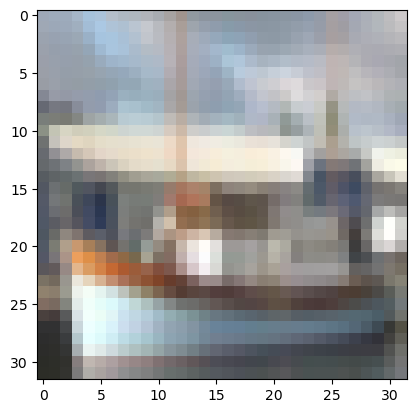

In [32]:
#load a sample batch from previous section
dataiter = iter(trainloader)
images, labels = next(dataiter)

#display first image of the batch
imshow(images[0])
print ('%5s' % classes[labels[0]])

truck


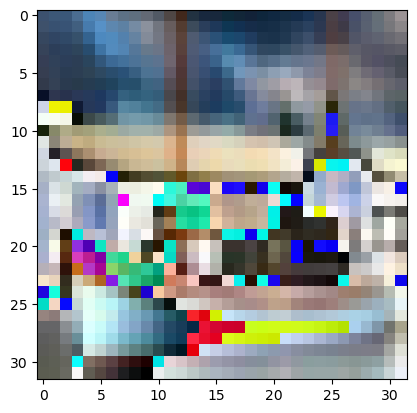

In [33]:
to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = transform(img)
imshow(imtran)
print ('%5s' % classes[labels[0]])

# **3. Definición de la red neuronal convolucional**

In [34]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()

    # Convolutional Layer
    self.conv1 = nn.Conv2d(3,16,3, padding=1)
    self.conv2 = nn.Conv2d(16,32,3,padding=1)
    self.conv3 = nn.Conv2d(32,64,3,padding=1)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*4*4,120)
    self.fc2 = nn.Linear(120, 60)
    self.fc3 = nn.Linear(60,10)
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):

    x =  self.pool(F.relu(self.conv1(x)))
    x =  self.pool(F.relu(self.conv2(x)))
    x =  self.pool(F.relu(self.conv3(x)))
    x =  x.view(-1,64*4*4)
    x =  self.dropout(x)
    x = F.relu(self.fc1(x))
    x =  self.dropout(x)
    x = F.relu(self.fc2(x))
    x =  self.dropout(x)
    x = self.fc3(x)
    return x

if torch.cuda.is_available():
  model = Net().cuda()
else:
  model = Net()

print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [36]:
# Training the model
display_batch_iter = 1000
number_epochs = 30

total_epochs = np.zeros(number_epochs)
epochs_loss = np.zeros(number_epochs)
epochs_train_accuracy = np.zeros(number_epochs)
epochs_test_accuracy = np.zeros(number_epochs)
train_time = 0.0

Ntrain = len(trainset)
Ntest = len(testset)

start = time.time()


if torch.cuda.is_available():
    print(f'Training on GPU mode #epochs:{number_epochs} #batches:{trainloader_len} #batch_size:{batch_size}')
else:
    print(f'Training on CPU mode #epochs:{number_epochs} #batches:{trainloader_len} #batch_size:{batch_size}')

print(f'Printing loss every {display_batch_iter} batches')


for epoch in range(number_epochs):
    running_loss = 0.0
    test_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # wrap them in Variable
        if torch.cuda.is_available():
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        if torch.cuda.is_available():
            loss_cpu = loss.data.cpu().numpy()
            running_loss += loss_cpu
            epochs_loss[epoch] += loss_cpu
        else:
            running_loss += loss.data.numpy()
            epochs_loss[epoch] += loss.data.numpy()

        if i % display_batch_iter == display_batch_iter-1:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / display_batch_iter}')
            running_loss = 0.0

    # Compute the accuracy on the training set
    correct1 = 0.0
    for data in trainloader:
        inputs, labels = data
        if torch.cuda.is_available():
            outputs = model(Variable(inputs.cuda()))
        else:
            outputs = model(Variable(inputs))
        _, predicted = torch.max(outputs.data, 1)
        if torch.cuda.is_available():
            correct1 += (predicted == labels.cuda()).sum()
        else:
            correct1 += (predicted == labels).sum()
    
    # Compute the accuracy on the test set
    correct2 = 0.0
    for data in testloader:
        inputs, labels = data
        if torch.cuda.is_available():
            outputs = model(Variable(inputs.cuda()))
        else:
            outputs = model(Variable(inputs))
        _, predicted = torch.max(outputs.data, 1)
        if torch.cuda.is_available():
            correct2 += (predicted == labels.cuda()).sum()
        else:
            correct2 += (predicted == labels).sum()
    
    epoch_loss = epochs_loss[epoch] / len(trainloader)        # average loss per batch
    epochs_train_accuracy[epoch] = 100 * correct1 / Ntrain    # average accuracy on the training set
    epochs_test_accuracy[epoch] = 100 * correct2 / Ntest      # average accuracy on the test set
    print(f'Epoch: {epoch + 1}, Loss: {epoch_loss}, Train Accuracy: {epochs_train_accuracy[epoch]}, Test Accuracy: {epochs_test_accuracy[epoch]}')


    # Validate the model
    model.eval()
    for data, target in testloader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)
        test_loss += criterion(output, target).item()

    test_loss /= len(testloader)
    running_loss /= len(trainloader)

    total_epochs[epoch] = epoch_loss
    
train_time = time.time() - start
print(f'Finished Training in {train_time} seconds')

# Save the model
torch.save(model.state_dict(), 'cifar10_model.pth')
print('Model saved')

Training on GPU mode #epochs:30 #batches:8334 #batch_size:6
Printing loss every 1000 batches
[1, 1000] loss: 2.3022260429859163
[1, 2000] loss: 2.2460766035318374
[1, 3000] loss: 2.006682749390602
[1, 4000] loss: 1.8718253380060197
[1, 5000] loss: 1.7666035885214806
[1, 6000] loss: 1.714669784128666
[1, 7000] loss: 1.665432105898857
[1, 8000] loss: 1.6064645060896874
Epoch: 1, Loss: 1.8846827685289427, Train Accuracy: 43.849998474121094, Test Accuracy: 43.89999771118164
[2, 1000] loss: 1.4522895870506765
[2, 2000] loss: 1.4087864789664746
[2, 3000] loss: 1.3523363106250763
[2, 4000] loss: 1.3218912654221058
[2, 5000] loss: 1.279296405941248
[2, 6000] loss: 1.2365861392319202
[2, 7000] loss: 1.2081862119585276
[2, 8000] loss: 1.184617663308978
Epoch: 2, Loss: 1.3004808540102644, Train Accuracy: 60.0099983215332, Test Accuracy: 59.29999923706055
[3, 1000] loss: 1.0963974491357804
[3, 2000] loss: 1.0836038265228272
[3, 3000] loss: 1.0627688418477774
[3, 4000] loss: 1.0613149029761553
[3, 

In [37]:
# Validate the model on the test set
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
for data, target in testloader:
    # move tensors to GPU if CUDA is available
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        data, target = data.cuda(), target.cuda()
    else:
        data, target = Variable(data), Variable(target)
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target).item()
    # update test loss
    test_loss += loss

    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(correct_tensor.cpu().numpy())
    del correct_tensor
    # calculate test accuracy for each object class
    batch_size = len(target)
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# Average test loss
test_loss = test_loss/len(testloader)
print(f'Test Loss: {test_loss}')

for i in range(9):
    if class_total[i] > 0:
        print(f'Test Accuracy of {classes[i]}: {100. * class_correct[i] / class_total[i]} ({class_correct[i]}/{class_total[i]})')
    else:
        print(f'Test Accuracy of {classes[i]}: N/A (no training examples)')


print(f'Test Accuracy (Overall): {100. * np.sum(class_correct) / np.sum(class_total)} ({np.sum(class_correct)}/{np.sum(class_total)})')

Test Loss: 1.841823384067719
Test Accuracy of plane: 76.1 (761.0/1000.0)
Test Accuracy of car: 73.3 (733.0/1000.0)
Test Accuracy of bird: 59.2 (592.0/1000.0)
Test Accuracy of deer: 63.2 (632.0/1000.0)
Test Accuracy of dog: 61.5 (615.0/1000.0)
Test Accuracy of frog: 53.9 (539.0/1000.0)
Test Accuracy of horse: 81.0 (810.0/1000.0)
Test Accuracy of ship: 77.2 (772.0/1000.0)
Test Accuracy of truck: 86.9 (869.0/1000.0)
Test Accuracy (Overall): 71.8 (7180.0/10000.0)


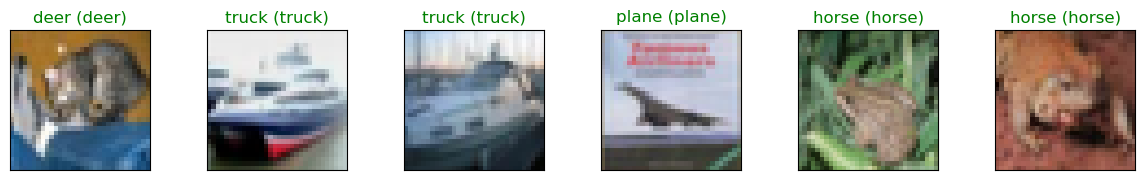

In [38]:
# Visualize Sample Test Results
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# move model inputs to cuda, if GPU available
if torch.cuda.is_available():
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not torch.cuda.is_available() else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(6):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    # Convert images to numpy for display
    images = images.cpu()
    imshow(images.cpu()[idx])
    ax.set_title(f'{classes[preds[idx]]} ({classes[labels[idx]]})', color=("green" if preds[idx]==labels[idx] else "red"))

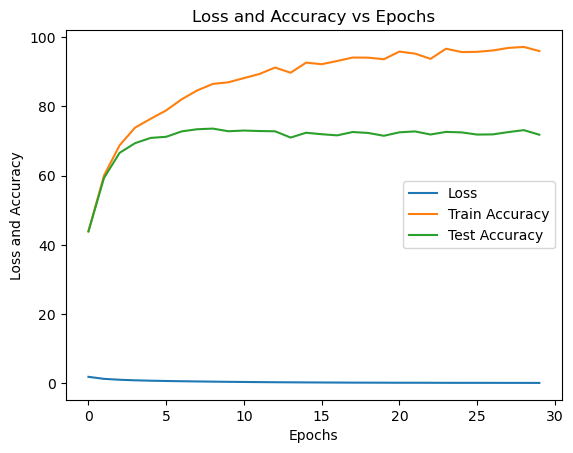

In [39]:
# Plot loss and accuracy
t = np.arange(number_epochs)
lineobjects = plt.plot(t, total_epochs, t, epochs_train_accuracy, t, epochs_test_accuracy)
plt.legend(iter(lineobjects), ('Loss', 'Train Accuracy', 'Test Accuracy'))
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.title('Loss and Accuracy vs Epochs')

# Save the data
# os.chdir('./data')

plt.savefig('accuracy result.png')
plt.show()